Install Libraries

In [ ]:
!pip install flash_attn -q timm -q
!pip install accelerate -q
!pip install einops -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.6 MB/s eta 0:00:00


Import Florence-2 Model

In [ ]:
!mkdir my_models
!mkdir my_models/Florence_2

In [ ]:
from transformers import AutoModelForCausalLM, AutoProcessor


model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large-ft",
                                             cache_dir="/content/my_models/Florence_2",
                                             device_map="cuda",
                                             trust_remote_code=True)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
processor = AutoProcessor.from_pretrained("/content/my_models/Florence_2/models--microsoft--Florence-2-large-ft/snapshots/c669c6b8bfbd7f0193fcb31f997879045a3612f3",
                                          trust_remote_code=True)

Load Input Image

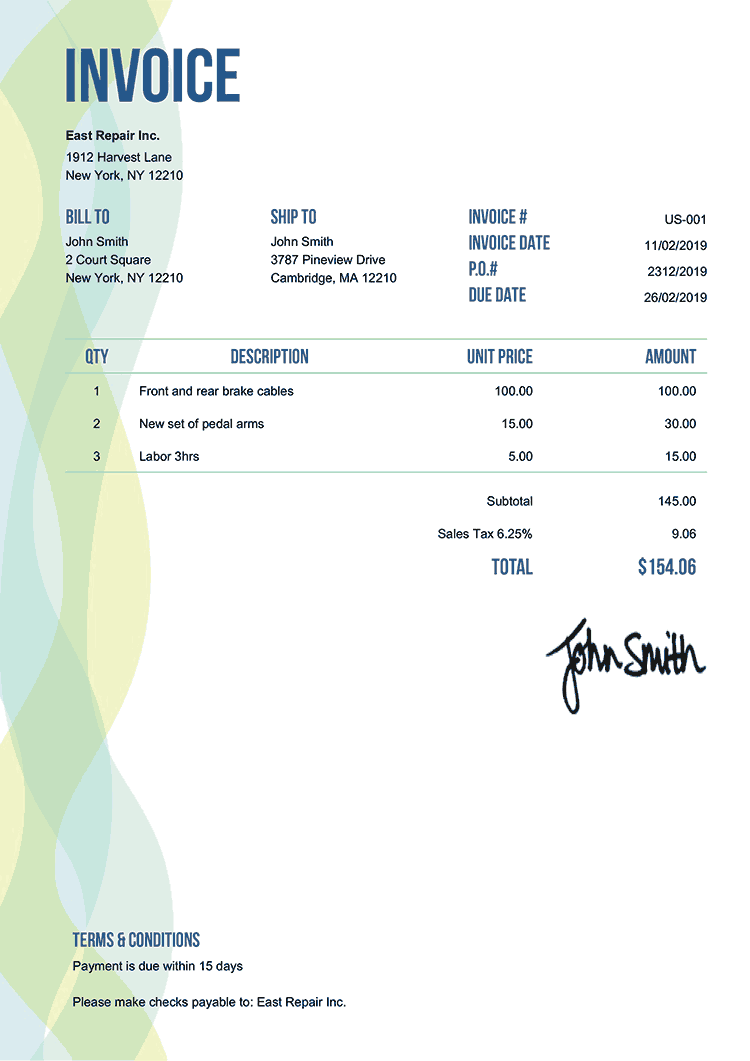

In [ ]:
import requests
from PIL import Image

url = "https://templates.invoicehome.com/invoice-template-us-dexter-750px.png"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image

Preprocess the Input

In [ ]:
prompt = '<OCR_WITH_REGION>'

inputs = processor(text=prompt, images=image, return_tensors="pt").to("cuda:0")

In [ ]:
inputs

{'input_ids': tensor([[   0, 2264,   16,    5, 2788,   11,    5, 2274,    6,   19, 3806,  116,
            2]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[1.6153, 1.6153, 1.6153,  ..., 2.2489, 2.2489, 2.2489],
          [1.6153, 1.6153, 1.6153,  ..., 2.2489, 2.2489, 2.2489],
          [1.6153, 1.6153, 1.6153,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [1.6153, 1.6153, 1.6153,  ..., 2.2489, 2.2489, 2.2489],
          [1.5982, 1.5982, 1.5982,  ..., 2.2489, 2.2489, 2.2489],
          [1.8893, 1.8893, 1.8893,  ..., 2.2489, 2.2489, 2.2489]],

         [[2.0784, 2.0784, 2.0784,  ..., 2.4286, 2.4286, 2.4286],
          [2.0784, 2.0784, 2.0784,  ..., 2.4286, 2.4286, 2.4286],
          [2.0784, 2.0784, 2.0784,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.0784, 2.0784, 2.0784,  ..., 2.4286, 2.4286, 2.4286],
          [2.0784, 2.0784, 2.0784,  ..., 2.4286, 2.4286, 2.4286],
          

Generate Response

In [ ]:
%%time
generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=4096,
      num_beams=3
    )

CPU times: user 12.1 s, sys: 7.13 ms, total: 12.1 s
Wall time: 14.5 s


In [ ]:
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
generated_text

'</s><s><s><s>INVOICE<loc_82><loc_42><loc_322><loc_42><loc_322><loc_98><loc_82><loc_98>East Repair Inc.<loc_85><loc_120><loc_213><loc_120><loc_213><loc_135><loc_85><loc_135>1912 Harvest Lane<loc_86><loc_141><loc_230><loc_141><loc_230><loc_154><loc_86><loc_154>New York, NY 12210<loc_85><loc_157><loc_244><loc_157><loc_244><loc_171><loc_85><loc_171>BILL TO<loc_85><loc_194><loc_147><loc_194><loc_147><loc_212><loc_85><loc_212>SHIP TO<loc_358><loc_194><loc_423><loc_194><loc_423><loc_212><loc_358><loc_212>INVOICEE #<loc_622><loc_194><loc_704><loc_194><loc_704><loc_212><loc_622><loc_212>US-001<loc_885><loc_199><loc_942><loc_199><loc_942><loc_212><loc_885><loc_212>John Smith<loc_85><loc_220><loc_171><loc_220><loc_171><loc_233><loc_85><loc_233>John Smith<loc_359><loc_220><loc_444><loc_220><loc_444><loc_233><loc_359><loc_233>INVOICE DATE<loc_622><loc_218><loc_735><loc_218><loc_735><loc_236><loc_622><loc_236>11/02/2019<loc_857><loc_223><loc_943><loc_223><loc_943><loc_237><loc_857><loc_237>John Smi

Post-process the output

In [ ]:
parsed_answer = processor.post_process_generation(generated_text, task=prompt, image_size=(image.width, image.height))
parsed_answer['<OCR_WITH_REGION>']

{'quad_boxes': [[61.875,
   45.092498779296875,
   241.875,
   45.092498779296875,
   241.875,
   104.50849914550781,
   61.875,
   104.50849914550781],
  [64.125,
   127.85050201416016,
   160.125,
   127.85050201416016,
   160.125,
   143.7655029296875,
   64.125,
   143.7655029296875],
  [64.875,
   150.13150024414062,
   172.875,
   150.13150024414062,
   172.875,
   163.92449951171875,
   64.875,
   163.92449951171875],
  [64.125,
   167.1074981689453,
   183.375,
   167.1074981689453,
   183.375,
   181.9615020751953,
   64.125,
   181.9615020751953],
  [64.125,
   206.364501953125,
   110.625,
   206.364501953125,
   110.625,
   225.46249389648438,
   64.125,
   225.46249389648438],
  [268.875,
   206.364501953125,
   317.625,
   206.364501953125,
   317.625,
   225.46249389648438,
   268.875,
   225.46249389648438],
  [466.875,
   206.364501953125,
   528.375,
   206.364501953125,
   528.375,
   225.46249389648438,
   466.875,
   225.46249389648438],
  [664.125,
   211.66949462

Draw on Image

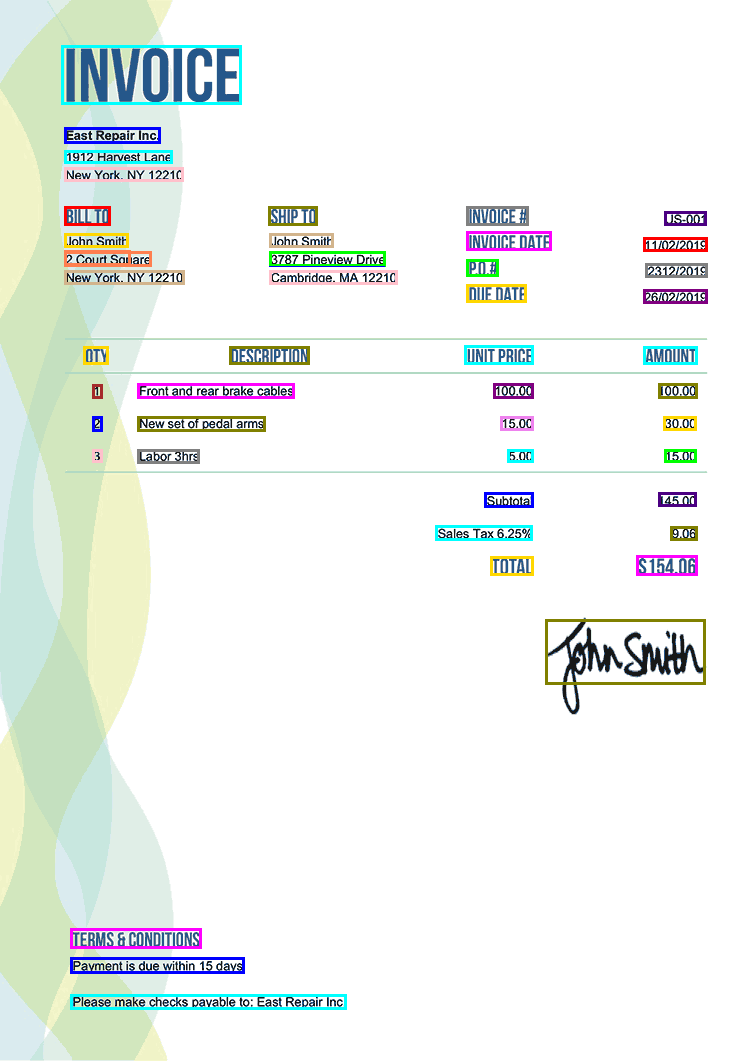

In [ ]:
import copy
from PIL import Image, ImageDraw, ImageFont
import random

import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']


def draw_ocr_bboxes(image, prediction):
    scale = 1
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)

    display(image)

output_image = copy.deepcopy(image)
draw_ocr_bboxes(output_image, parsed_answer['<OCR_WITH_REGION>'])